# **Stacked LSTM**
Multiple idden LSTM layers can be stacked one on top of another in what is referred to as a Stacked LSTM model

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df['error'] = df['Tsp1'] - df['T1']

In [5]:
X = df[['error', 'Tsp1']].values
y = df[['Q1']].values

## **Preprocessing data**

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

## Data for layer LSTM
window = 60
X_lstm = []
y_lstm = []
for i in range(window, len(X)):
    X_lstm.append(X_scaled[i-window:i])
    y_lstm.append(y_scaled[i])
## [samples, timesteps, features]
## Format accepted by LSTM algorithm
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

## Partition of data
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

## **Modeling of neural networks** 

In [21]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(X_lstm.shape[1], X_lstm.shape[2]), return_sequences=True))
model.add(Dropout(rate=0.1))
model.add(LSTM(50, activation='tanh'))
model.add(Dropout(rate=0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

result = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=100, verbose=1)
model.save('Lstm_stacked.h5')

Epoch 1/200


2022-08-18 02:48:37.510473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 02:48:37.820340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 02:48:37.951426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 02:48:38.119195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 02:48:38.298610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - ETA: 0s - loss: 0.0252

2022-08-18 02:48:42.607162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 02:48:42.714923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 02:48:42.811939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 7s 55ms/step - loss: 0.0252 - val_loss: 0.0181
Epoch 2/200
92/92 [==============================] - 4s 40ms/step - loss: 0.0120 - val_loss: 0.0134
Epoch 3/200
92/92 [==============================] - 4s 39ms/step - loss: 0.0090 - val_loss: 0.0131
Epoch 4/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0075 - val_loss: 0.0081
Epoch 5/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0061 - val_loss: 0.0088
Epoch 6/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 7/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0045 - val_loss: 0.0089
Epoch 8/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0044 - val_loss: 0.0056
Epoch 9/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0040 - val_loss: 0.0051
Epoch 10/200
92/92 [==============================] - 3s 37ms/step - loss: 0.0041 - val_loss: 0.0056
Epoch 11/20

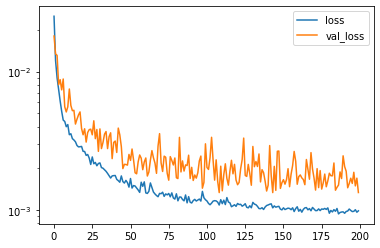

In [22]:
plt.semilogy(result.history['loss'], label='loss')
plt.semilogy(result.history['val_loss'], label='val_loss')
plt.legend();

## **Metrics**

In [23]:
from sklearn.metrics import mean_squared_error
predict = model.predict(X_test)

predict = scaler_y.inverse_transform(predict[:,-1,].reshape(-1,1))
yt = scaler_y.inverse_transform(y_test)
print("Mean Squered Error: ", mean_squared_error(predict[:,0], yt))

2022-08-18 03:04:16.677494: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 03:04:16.858383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/90 [>.............................] - ETA: 1s  

2022-08-18 03:04:17.018533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


90/90 [==============================] - 3s 21ms/step
Mean Squered Error:  10.02799773911564


## **Comparing results**

[]

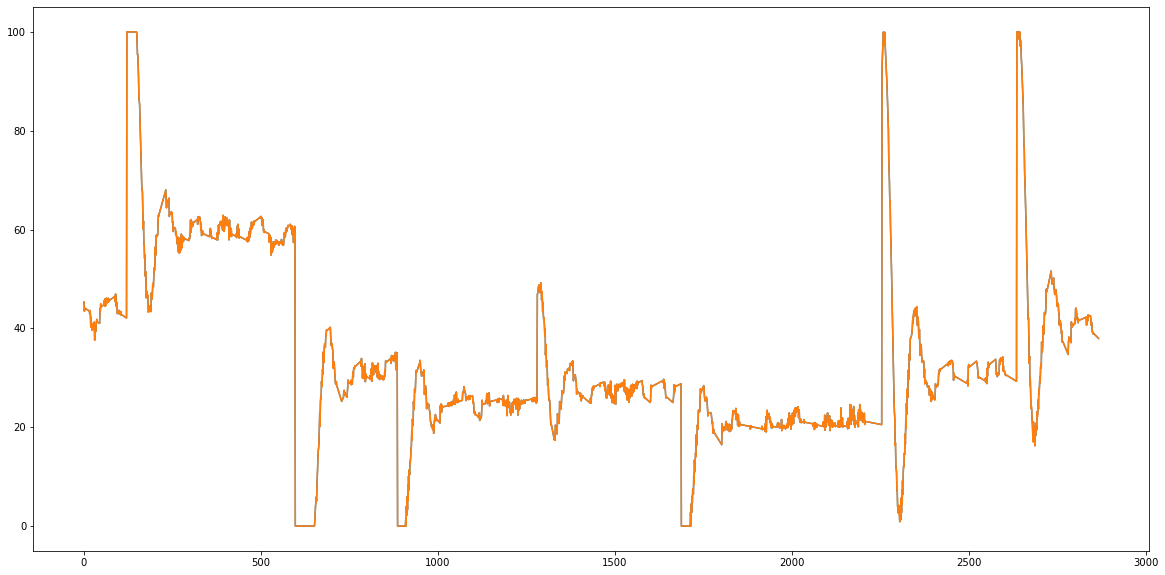

In [24]:
X_test_us = scaler_x.inverse_transform(X_test[:,-1,:])
y_test_us = scaler_y.inverse_transform(y_test)
plt.figure(figsize=(20,10))
plt.plot(yt)
plt.plot(y_test_us)
plt.plot()